In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats # for zscore to find outliars 
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


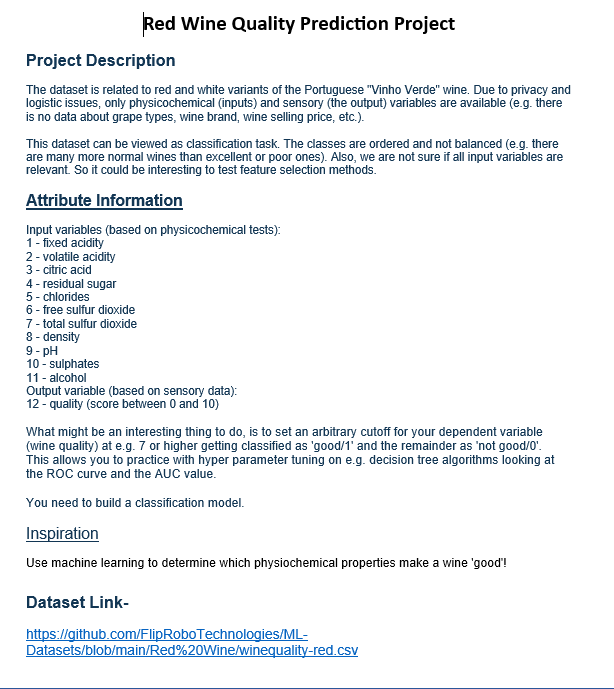

In [178]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [144]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1) Variance in Features: Features like residual sugar, free sulfur dioxide, and total sulfur dioxide have significant variance.
2) Potential Predictors of Quality: Higher alcohol content shows a moderate positive correlation with quality (0.41). This could be a strong predictor in your classification model.
3) Low Correlation Features: Free sulfur dioxide, total sulfur dioxide, density, and pH have low correlation with quality and might be less important predictors.
4) Binarized Quality: The majority of the wines are classified as 'not good' based on your binarization, reflecting the imbalance in the dataset.

In [145]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [146]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [52]:
# wehn the wine qualtiy low then volatile acidity and vice versa
  

### Data Analysis

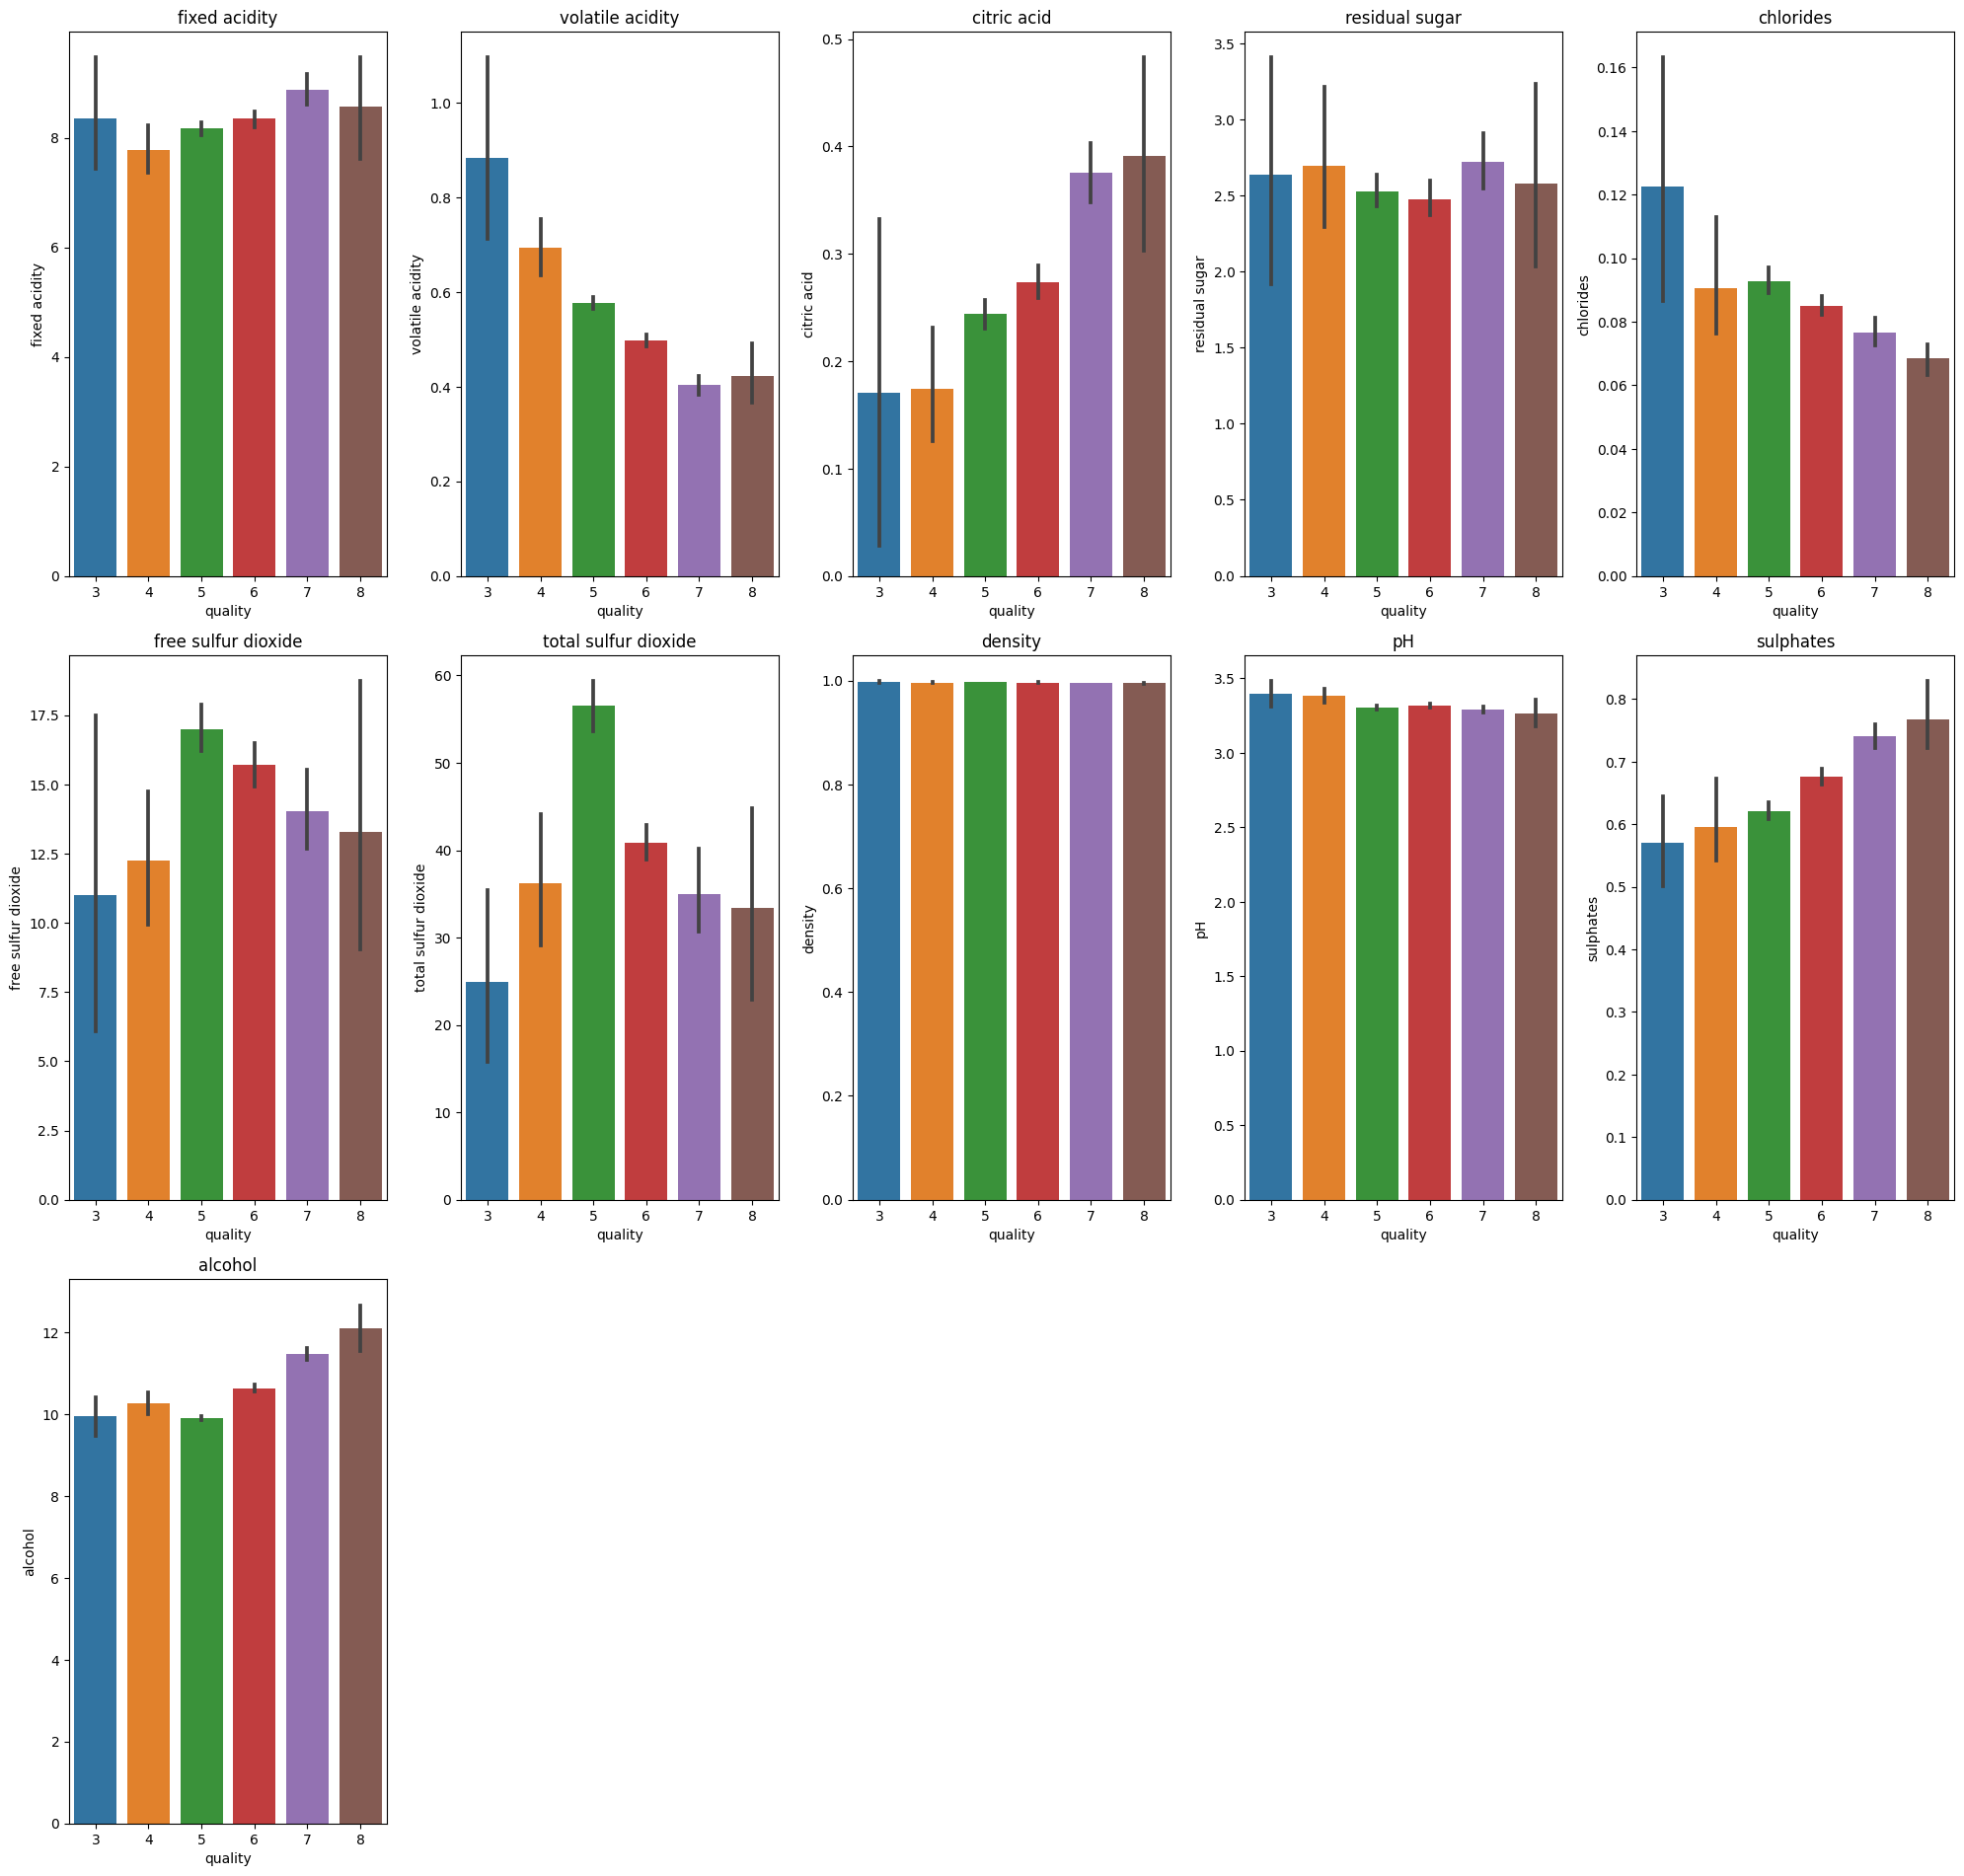

In [147]:
x=df.drop('quality',axis=1)
y=df['quality']
plt.figure(figsize=(20,25),facecolor='white')
p=1

for i in x.columns:
    axs = plt.subplot(4, 5, p)  # Create subplot with 4 rows and 5 columns
    sns.barplot(x=y, y=x[i], ax=axs)  # Create bar plot
    axs.set_title(i)  # Set title for the subplot
    p += 1
    
plt.tight_layout()
plt.show()

1. There is down trend in velatile acidity
2. There is increasing trend in citric acid 
3. There is down trend in chloride
4. There is increasing trend in sulphate
5. There is increasing trend in alchohal
6. There is down trend in pH

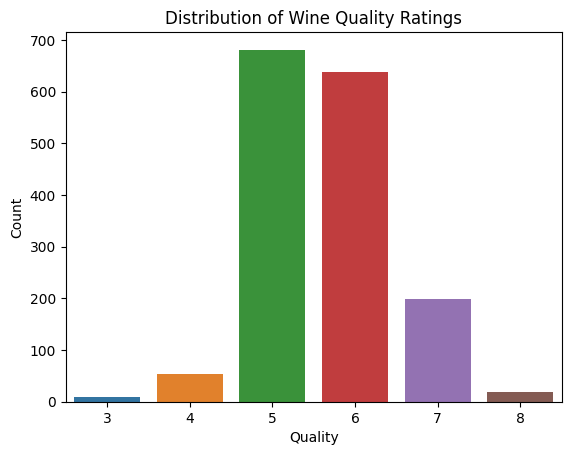

In [111]:
sns.countplot(x='quality', data=df)

# Display the plot
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

<Axes: >

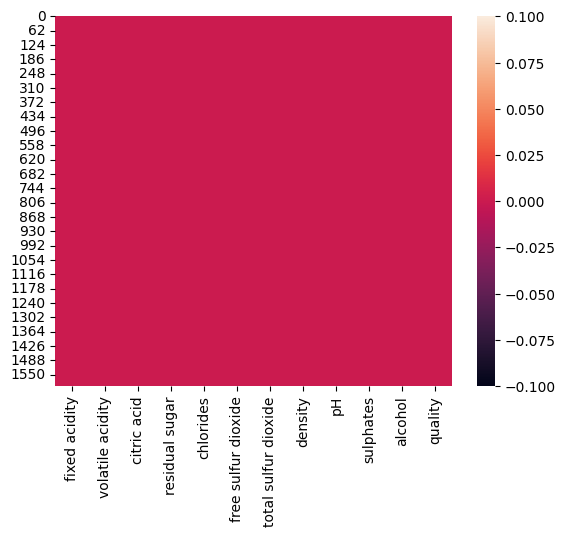

In [112]:
sns.heatmap(df.isnull()) # we can see below no missing data present 

In [148]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


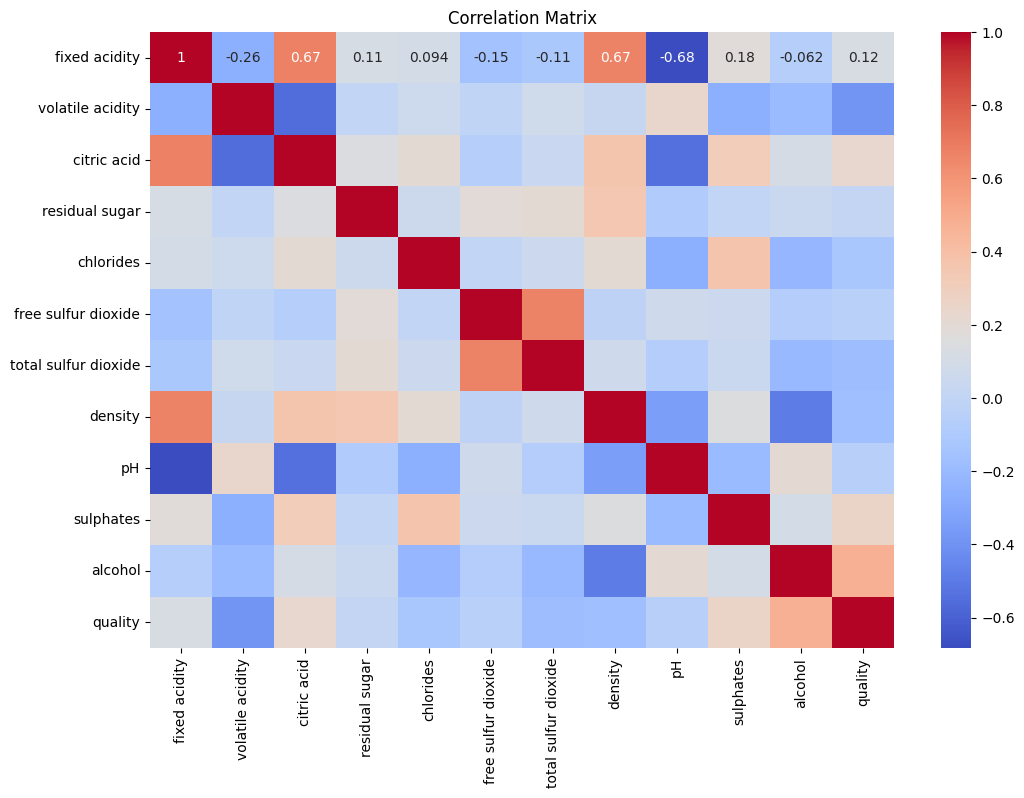

In [114]:
# Display the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# No need to delete any column here 

In [179]:
# Detection of outliars using Z score

z=np.abs(stats.zscore(df))
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [180]:
# Deleting all which < 3 zscore

New_df=df[(z<3).all(axis=1)]
print(New_df.shape)
print(df.shape)

(1451, 12)
(1599, 12)


In [181]:
New_df['quality'].value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

In [184]:
#  spliting quality in two variable 1 if quality more than 7 then it  will 1 other wise it will be 0
New_df['quality']=df['quality'].apply (lambda x : 1 if x> 7 else 0)
New_df['quality'].value_counts()

quality
0    1435
1      16
Name: count, dtype: int64

In [186]:
New_df['quality'].value_counts()

quality
0    1435
1      16
Name: count, dtype: int64

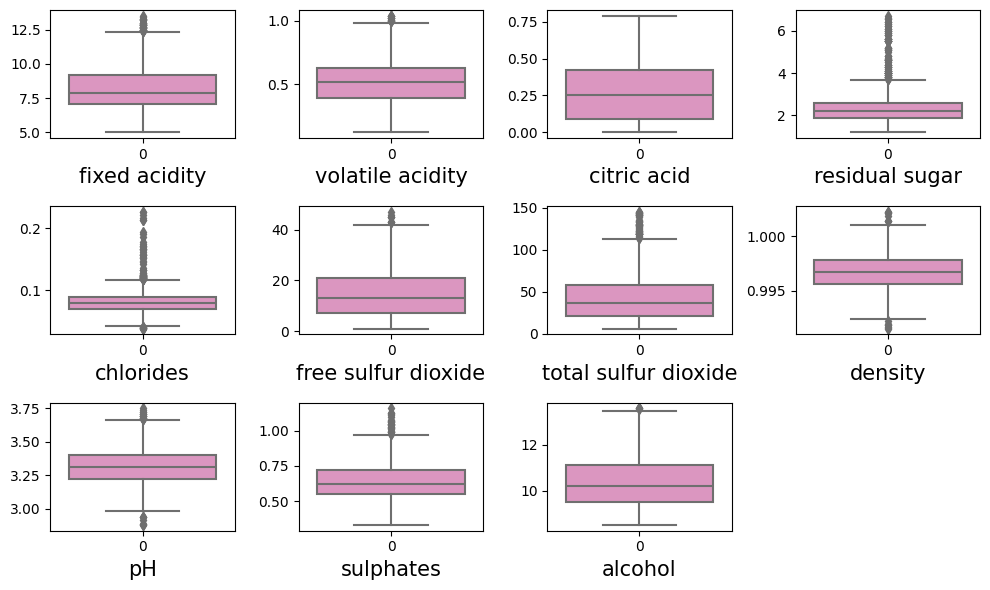

In [183]:
# lets check the outliars
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1

for col in New_df.columns:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(New_df[col],palette='Set2_r')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [188]:
x=New_df.drop('quality',axis=1)
y=New_df['quality']


In [189]:
y.value_counts()

quality
0    1435
1      16
Name: count, dtype: int64

In [190]:
# Feature scaling using standard scaralization

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x
# now we have scaled the features by standard scaler to remove the biasness in feature , we do not scaled Target in any case

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,1.801286,0.519556,-0.216491


In [192]:
y.value_counts()

quality
0    1435
1      16
Name: count, dtype: int64

In [193]:
# Now checking Variance inflation factor (VIF) in each scaled columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor (x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF_Values,Features
0,7.942437,fixed acidity
1,1.861970,volatile acidity
2,3.191798,citric acid
3,1.653039,residual sugar
4,1.171792,chlorides
5,1.933500,free sulfur dioxide
6,2.185633,total sulfur dioxide
7,6.418063,density
8,3.214298,pH
9,1.309630,sulphates


In [ ]:
# Here no column have multicoleaniarity issue as all columns VIG score is less the 10. Hence no need to drop any column 

In [194]:
y.value_counts()

quality
0    1435
1      16
Name: count, dtype: int64

### we have to balance the data using oversampling method

In [196]:
# oversampling the data 
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
print(x1)
print(y1)

# in Oversampling SMOTE will create new lines to balance the data
# in UnderSampling SMOTe will remove the lines or rows to balance the ratio of y 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
1         -0.309900          2.119336    -1.390400        0.246832   0.790825   
2         -0.309900          1.407054    -1.180831       -0.101284   0.504550   
3          1.755851         -1.442071     1.543569       -0.565439  -0.306564   
4         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
...             ...               ...          ...             ...        ...   
2865       0.297988         -0.658684     0.884022       -0.681478  -0.583149   
2866       0.648351         -0.781203     1.256443       -0.520662  -0.505680   
2867       1.240329         -1.214570     1.531041       -0.458908  -0.668238   
2868      -0.363237         -0.153569     0.348773       -0.024853  -0.514845   
2869       0.491821         -0.733415     1.231135       -0.670138  -0.497997   

      free sulfur dioxide  

In [198]:
# checking value count from target column 
y1.value_counts()

quality
0    1435
1    1435
Name: count, dtype: int64

In [199]:
y.value_counts()

quality
0    1435
1      16
Name: count, dtype: int64

### Model Building

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

### Decision Tree Classifier

In [218]:
DT=DecisionTreeClassifier(random_state=42)
DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [219]:
pred=DT.predict(x_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,

In [220]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,pred)
acc

0.9825783972125436

In [221]:
print(confusion_matrix(y_test,pred))

[[300   8]
 [  2 264]]


In [222]:
# Cross Vaidation method

from sklearn.model_selection import cross_val_score
# checking CV score for Randm Forest

score=cross_val_score(DT,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,pred)-score.mean())

[0.9738676  0.96689895 0.97735192 0.96515679 0.96341463]
0.9693379790940767
Difference between Accuracy score and cross validation score is :  0.013240418118466879


### hyper parameter tuning 

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_dt

{'max_depth': [3, 5, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [226]:
param_grid=param_grid_dt

In [227]:
GCV=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
GCV

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [228]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [229]:
GCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [236]:
Final_model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=4,min_samples_split=2)
Final_model.fit(x_train,y_train)
Final_pred=Final_model.predict(x_test)
Final_acc=accuracy_score(y_test,Final_pred)
print(Final_pred)
print('/n')
print(Final_acc*100)

[0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 

In [238]:
print(acc*100)

print(Final_acc*100)


98.25783972125436
96.16724738675958


### Ploting ROC and auc curve

In [232]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve

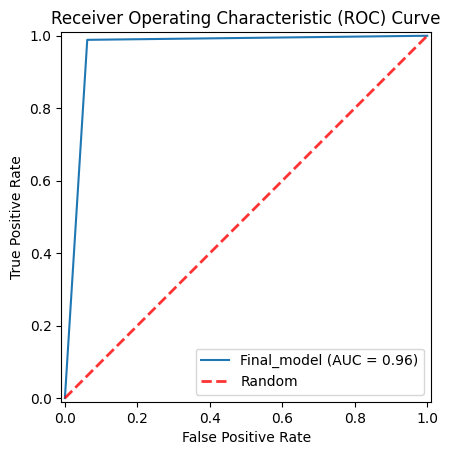

In [244]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming `pred` is your model's predictions and `y_test` is the actual labels
fpr, tpr, thresholds = metrics.roc_curve(y_test, Final_pred)

# Calculate the AUC (Area Under Curve) for ROC
roc_auc = metrics.auc(fpr, tpr)

# Create an ROC Curve plot using RocCurveDisplay
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

# Plot the ROC Curve
display.plot()

# Add the diagonal line (representing random guess) to the plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


### Saving the Model

In [240]:
import joblib
joblib.dump(Final_model,'Red_Wine_quality_analysis,pkl')


['Red_Wine_quality_analysis,pkl']

### Prdicting the saved model

In [241]:
# Lets load the saved model and get the prediction 

model=joblib.load('Red_Wine_quality_analysis,pkl')

# prediction

Prediction=model.predict(x_test)

Prediction
    


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,

In [242]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=Prediction
df['Original']=a
df

,Predicted,Original
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
569,0,0
570,1,1
571,0,0
572,1,1
